In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np 
import pandas as pd
import os
import cv2
from tqdm import tqdm
from random import shuffle
import pickle
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

image_size = 160

datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range = 40,
    zoom_range = 0.2,
    horizontal_flip = True
    )

train_generator = datagen.flow_from_directory(
        'drive/MyDrive/dog-breed-identification/train_labeled',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical',
        seed=42,
        shuffle=True,)
        

validation_generator = datagen.flow_from_directory(
        'drive/MyDrive/dog-breed-identification/valid_folders',
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical',
        seed=42,
        shuffle=True,) 

Mounted at /content/drive
Found 10222 images belonging to 120 classes.
Found 1680 images belonging to 120 classes.


In [2]:
IMG_SHAPE = (image_size, image_size, 3)

import tensorflow as tf
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
                          base_model,
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(120, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step


In [3]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 200,
                              epochs=60,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
200/200 [==============================] - 1924s 9s/step - loss: 108.0413 - accuracy: 0.2948 - val_loss: 80.1142 - val_accuracy: 0.4744
Epoch 2/60
200/200 [==============================] - 603s 3s/step - loss: 90.4660 - accuracy: 0.4741 - val_loss: 75.2773 - val_accuracy: 0.5649
Epoch 3/60
200/200 [==============================] - 280s 1s/step - loss: 88.1622 - accuracy: 0.5314 - val_loss: 76.7807 - val_accuracy: 0.6012
Epoch 4/60
200/200 [==============================] - 166s 829ms/step - loss: 80.6099 - accuracy: 0.5765 - val_loss: 64.9295 - val_accuracy: 0.6542
Epoch 5/60
200/200 [==============================] - 123s 614ms/step - loss: 74.9575 - accuracy: 0.6197 - val_loss: 52.6340 - val_accuracy: 0.6929
Epoch 6/60
200/200 [==============================] - 103s 514ms/step - loss: 65.8590 - accuracy: 0.6680 - val_loss: 59.1669 - val_accuracy: 0.7119
Epoch 7/60
200/200 [==============================] - 96s 479ms/step - loss: 65.8286 - accuracy: 0.6814 - val_loss: 50.

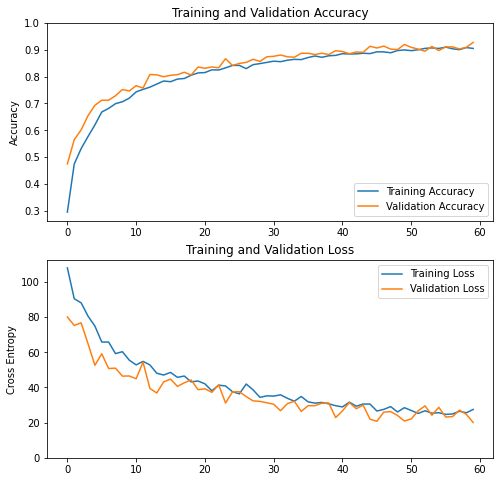

In [6]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()